In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Exploratory Data Analysis

In [2]:
#read in dataset
cleaned_data = pd.read_csv('CleanedData.csv',encoding='latin1',low_memory=False)
cleaned_data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,8,2,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12


In [3]:
cleaned_data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice,Hour,Day,Month
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,560590.875047,13.119702,3.125914,15287.843865,22.631500,12.721532,2.606911,7.601871
std,13087.063759,180.492832,22.241836,1713.539549,311.099224,2.276661,1.923929,3.415015
min,536365.000000,1.000000,0.001000,12346.000000,0.001000,6.000000,0.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,4.950000,11.000000,1.000000,5.000000
50%,561874.000000,6.000000,1.950000,15150.000000,12.450000,13.000000,2.000000,8.000000
75%,572061.000000,12.000000,3.750000,16791.000000,19.800000,14.000000,4.000000,11.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000,20.000000,6.000000,12.000000


In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
 8   TotalPrice   392692 non-null  float64
 9   Hour         392692 non-null  int64  
 10  Day          392692 non-null  int64  
 11  Month        392692 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 36.0+ MB


## Customer Analysis

In [5]:
#Unique Customers
print("Number of customers:",cleaned_data['CustomerID'].nunique())

Number of customers: 4338


### Transaction Frequency

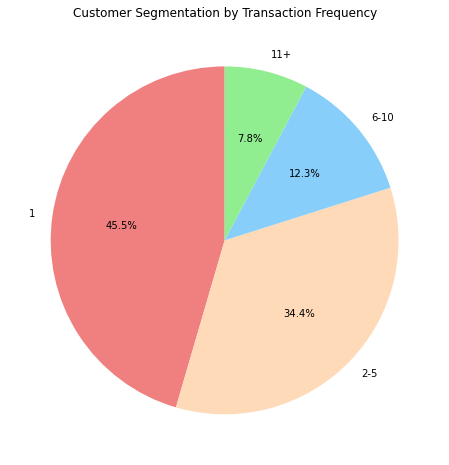

In [6]:
#Transaction Frequency
transaction_frequency = cleaned_data.groupby('CustomerID')['InvoiceNo'].nunique()

# Define segments based on transaction frequency
bins = [0, 1, 5, 10, np.inf]
labels = ['1', '2-5', '6-10', '11+']
cleaned_data['TransactionFrequency'] = pd.cut(transaction_frequency, bins=bins, labels=labels)

# Now, analyze each segment
segment_counts = cleaned_data['TransactionFrequency'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'peachpuff', 'lightskyblue', 'lightgreen'])
plt.title('Customer Segmentation by Transaction Frequency')
plt.show()

### Top Customers

In [7]:
# Total spending per customer
total_spending = cleaned_data.groupby('CustomerID')['TotalPrice'].sum()

# Sorting to get top customers
top_customers = total_spending.sort_values(ascending=False).head(10)

# Total spending per customer
total_spending = cleaned_data.groupby('CustomerID')['TotalPrice'].sum()

# Sorting to get top customers
top_customers = total_spending.sort_values(ascending=False).head(10)
top_customers

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: TotalPrice, dtype: float64

### Customer Retention

In [8]:
# Identify repeat customers
repeat_customers = cleaned_data[cleaned_data['TransactionFrequency'] > '1']

# Calculate retention rate
retention_rate = len(repeat_customers['CustomerID'].unique()) / len(cleaned_data['CustomerID'].unique())

In [9]:
# Calculate the percentage of repeat customers
percent_repeat_customers = retention_rate * 100

# Calculate the churn rate (1 - retention rate)
churn_rate = 1 - retention_rate

# Print the percentage of repeat customers
print(f"Percentage of Repeat Customers: {percent_repeat_customers:.2f}%")

Percentage of Repeat Customers: 5.42%


## Product Analysis

In [10]:
#Unique Products
print("Number of products:",cleaned_data['StockCode'].nunique())

Number of products: 3665


### Top Products

#### Top Products By Quantity Sold

Overall Total Quantity Sold: 5152002


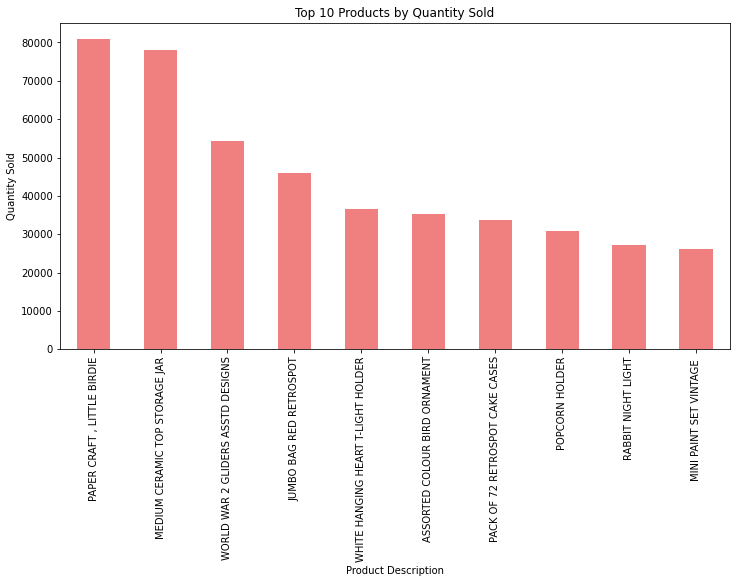

In [11]:
# Calculate total quantity sold for the entire dataset
total_quantity = cleaned_data['Quantity'].sum()

# Print the total quantity
print(f"Overall Total Quantity Sold: {total_quantity}")


# Top 10 products by quantity sold
top_products_quantity = cleaned_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Bar chart for top products by quantity
plt.figure(figsize=(12, 6))
top_products_quantity.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Quantity Sold')
plt.show()

### Top Product By Revenue Generated

Overall Total Revenue: 8887208.89


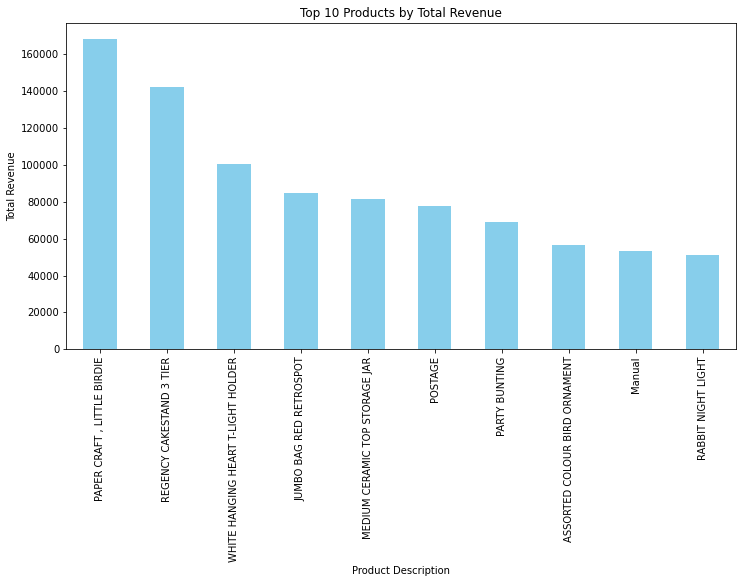

In [12]:
# Calculate total revenue for the entire dataset
total_revenue = cleaned_data['TotalPrice'].sum()

# Print the total revenue
print(f"Overall Total Revenue: {total_revenue:.2f}")

# Top 10 products by total revenue
top_products_revenue = cleaned_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Bar chart for top products by revenue
plt.figure(figsize=(12, 6))
top_products_revenue.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.show()

## Time Analysis

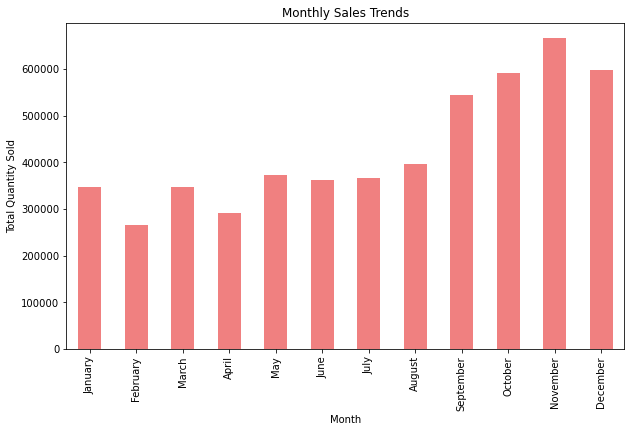

In [13]:
# Monthly sales trends
monthly_sales = cleaned_data.groupby('Month')['Quantity'].sum()

# Set month names as index
monthly_sales.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='lightcoral')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

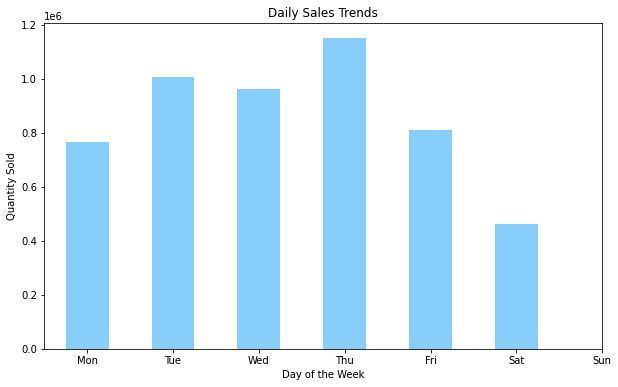

In [14]:
# Daily sales trends
daily_sales = cleaned_data.groupby('Day')['Quantity'].sum()

# Bar chart for daily sales trends
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='lightskyblue')
plt.title('Daily Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity Sold')

# Set xticks with specified labels
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

plt.show()


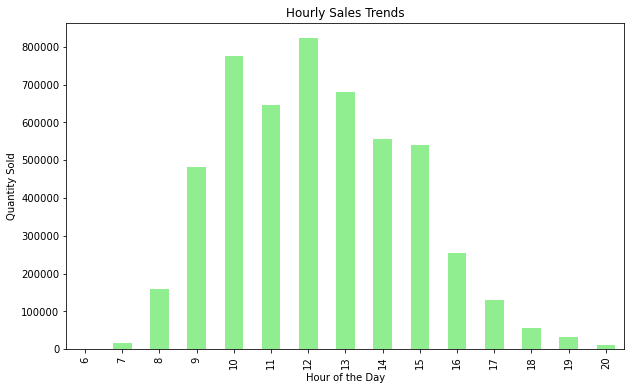

In [15]:
# Hourly sales trends
hourly_sales = cleaned_data.groupby('Hour')['Quantity'].sum()

# Line chart for hourly sales trends
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='bar', color='lightgreen')
plt.title('Hourly Sales Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Quantity Sold')
plt.show()


## Country Analysis

In [16]:
# Group by 'Country' and calculate total sales
country_sales = cleaned_data.groupby('Country')['TotalPrice'].sum()

# Sort the total sales
sorted_country_sales = country_sales.sort_values(ascending=False)

# Display the top 5 countries by total sales
top_5_country_sales = sorted_country_sales.head(5)
print(top_5_country_sales)

Country
United Kingdom    7285024.644
Netherlands        285446.340
EIRE               265262.460
Germany            228678.400
France             208934.310
Name: TotalPrice, dtype: float64


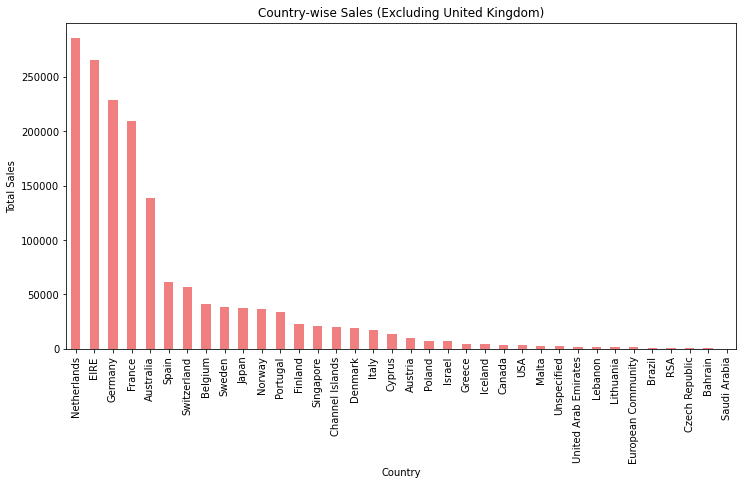

In [17]:
# Exclude entries for the United Kingdom
countries_excluding_uk = cleaned_data[cleaned_data['Country'] != 'United Kingdom']

# Group by 'Country' and calculate total sales
country_sales_excluding_uk = countries_excluding_uk.groupby('Country')['TotalPrice'].sum()

# Bar chart for country-wise sales excluding the United Kingdom
plt.figure(figsize=(12, 6))
country_sales_excluding_uk.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Country-wise Sales (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


In [18]:
# Group by 'Country' and calculate the number of unique customers
customer_count_per_country = cleaned_data.groupby('Country')['CustomerID'].nunique()

# Sort the customer counts
sorted_customer_count = customer_count_per_country.sort_values(ascending=False)

# Display the top 5 countries by the number of unique customers
top_5_customer_count = sorted_customer_count.head(5)
print(top_5_customer_count)


Country
United Kingdom    3920
Germany             94
France              87
Spain               30
Belgium             25
Name: CustomerID, dtype: int64


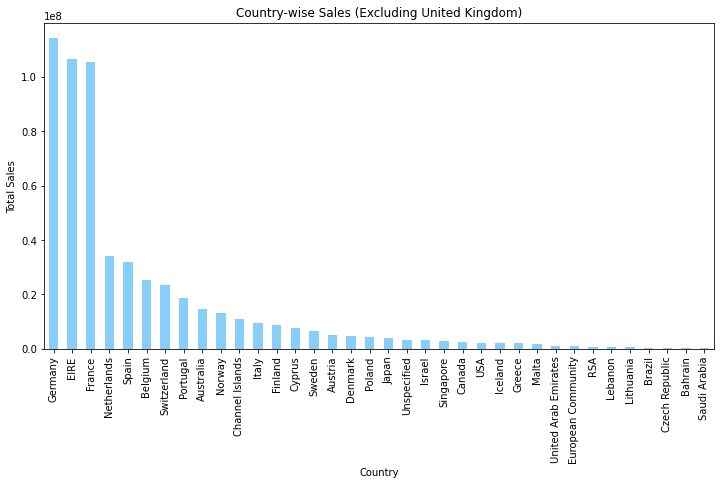

In [19]:
# Group by 'Country' and calculate total sales
country_CID_excluding_uk = countries_excluding_uk.groupby('Country')['CustomerID'].sum()

# Bar chart for country-wise sales excluding the United Kingdom
plt.figure(figsize=(12, 6))
country_CID_excluding_uk.sort_values(ascending=False).plot(kind='bar', color='lightskyblue')
plt.title('Country-wise Sales (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [20]:
# Group by 'Country' and calculate the average transaction value
avg_transaction_value = cleaned_data.groupby('Country')['TotalPrice'].mean()

# Sort the average transaction values
sorted_avg_transaction_value = avg_transaction_value.sort_values(ascending=False)

# Display the top 5 countries by the average transaction value
top_5_avg_transaction_value = sorted_avg_transaction_value.head(5)
print(top_5_avg_transaction_value)


Country
Netherlands    121.003111
Australia      117.234386
Japan          116.561900
Singapore       95.852658
Sweden          85.261844
Name: TotalPrice, dtype: float64


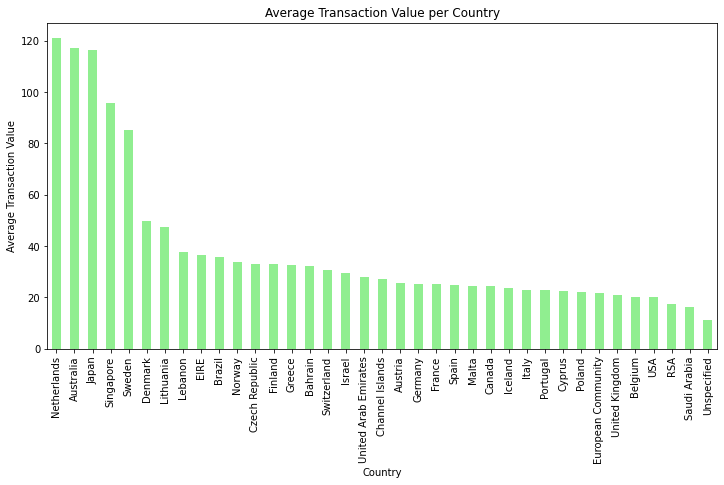

In [21]:
# Calculate average transaction value per country
avg_transaction_value = cleaned_data.groupby('Country')['TotalPrice'].mean()

# Bar chart for average transaction value per country
plt.figure(figsize=(12, 6))
avg_transaction_value.sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Average Transaction Value per Country')
plt.xlabel('Country')
plt.ylabel('Average Transaction Value')
plt.show()

In [22]:
# Count transaction frequency per country
transaction_frequency = cleaned_data.groupby('Country')['InvoiceNo'].nunique()

# Sort the transaction frequencies
sorted_transaction_frequency = transaction_frequency.sort_values(ascending=False)

# Display the top 5 transaction frequencies
top_5_transaction_frequency = sorted_transaction_frequency.head(5)
print(top_5_transaction_frequency)

Country
United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Name: InvoiceNo, dtype: int64


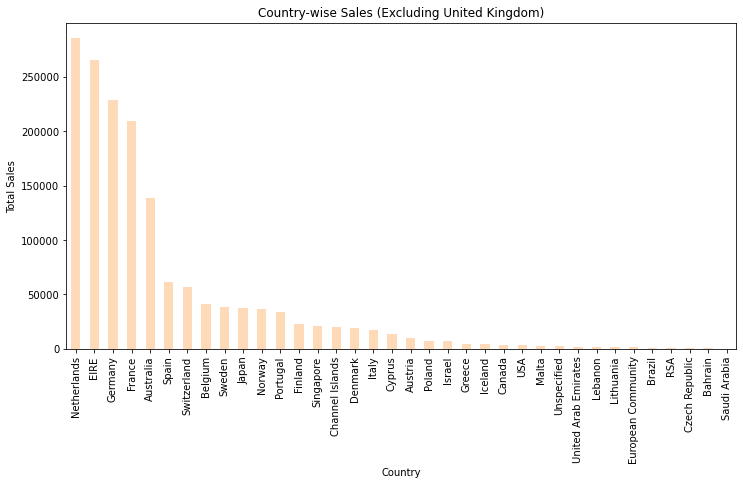

In [23]:
# Group by 'Country' and calculate total sales
country_sales_excluding_uk = countries_excluding_uk.groupby('Country')['TotalPrice'].sum()

# Bar chart for country-wise sales excluding the United Kingdom
plt.figure(figsize=(12, 6))
country_sales_excluding_uk.sort_values(ascending=False).plot(kind='bar', color='peachpuff')
plt.title('Country-wise Sales (Excluding United Kingdom)')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()
